In [33]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import itertools
from collections import Counter
from networkx.drawing.nx_agraph import graphviz_layout
import statistics
import seaborn as sns
from os import walk
import math
from scipy import stats

## Load Relative Abundance DataFrames for all Countries

In [34]:
globalAbundanceDF = pd.read_csv('./Files/Dataframes/allCohorts_allSpecies.csv').set_index("SampleName")
globalAbundanceDF.head()

,Abiotrophia_defectiva,Absiella_dolichum,Acetanaerobacterium_elongatum,Acetitomaculum_ruminis,Acetivibrio_ethanolgignens,Acholeplasma_axanthum,Acholeplasma_brassicae,Acholeplasma_modicum,Acidaminococcus_fermentans,Acidaminococcus_intestini,...,Yersinia_rohdei,Yersinia_ruckeri,Yokenella_regensburgei,Youngiibacter_fragilis,Zhihengliuella_sp_ISTPL4,bacterium_A52C2,bacterium_LF-3,bacterium_MS4,endosymbiont_TC1_of_Trimyema_compressum,nan
SampleName,,,,,,,,,,,,,,,,,,,,,
DRR127524,0.000015,0.000685,0.0,0.0,0.000144,NaN,0.0,NaN,0.000021,0.000100,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000119,0.0,0.0,0.0
DRR127532,0.000000,0.000152,0.0,0.0,0.000062,NaN,0.0,NaN,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000041,0.0,0.0,0.0
DRR127535,0.000000,0.000140,0.0,0.0,0.000197,NaN,0.0,NaN,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000356,0.0,0.0,0.0
DRR127537,0.000000,0.000029,0.0,0.0,0.000015,NaN,0.0,NaN,0.001345,0.000680,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000076,0.0,0.0,0.0
DRR127546,0.000000,0.000747,0.0,0.0,0.000292,NaN,0.0,NaN,0.000000,0.000038,...,0.0,0.0,0.0,0.0,0.0,0.000019,0.000533,0.0,0.0,0.0


In [35]:
for column in globalAbundanceDF.columns:
    if column != 'Cohort':
        globalAbundanceDF[column] = globalAbundanceDF[column].astype(float)
        
globalAbundanceDF.replace(0.0, np.nan, inplace=True)
globalAbundanceDF.head()

,Abiotrophia_defectiva,Absiella_dolichum,Acetanaerobacterium_elongatum,Acetitomaculum_ruminis,Acetivibrio_ethanolgignens,Acholeplasma_axanthum,Acholeplasma_brassicae,Acholeplasma_modicum,Acidaminococcus_fermentans,Acidaminococcus_intestini,...,Yersinia_rohdei,Yersinia_ruckeri,Yokenella_regensburgei,Youngiibacter_fragilis,Zhihengliuella_sp_ISTPL4,bacterium_A52C2,bacterium_LF-3,bacterium_MS4,endosymbiont_TC1_of_Trimyema_compressum,nan
SampleName,,,,,,,,,,,,,,,,,,,,,
DRR127524,0.000015,0.000685,NaN,NaN,0.000144,NaN,NaN,NaN,0.000021,0.000100,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000119,NaN,NaN,NaN
DRR127532,NaN,0.000152,NaN,NaN,0.000062,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000041,NaN,NaN,NaN
DRR127535,NaN,0.000140,NaN,NaN,0.000197,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000356,NaN,NaN,NaN
DRR127537,NaN,0.000029,NaN,NaN,0.000015,NaN,NaN,NaN,0.001345,0.000680,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000076,NaN,NaN,NaN
DRR127546,NaN,0.000747,NaN,NaN,0.000292,NaN,NaN,NaN,NaN,0.000038,...,NaN,NaN,NaN,NaN,NaN,0.000019,0.000533,NaN,NaN,NaN


## Load Human Oral Microbe Info

In [36]:
OralMicrobeDF = pd.read_csv('./Files/homd_taxonomy_table.csv')
OralMicrobeList = [str(OralMicrobeDF.at[row,'Genus'])+"_"+(str(OralMicrobeDF.at[row,'Species']).replace("'","").replace(" ", '_').replace("[","").replace("]","").replace(".","")) for row in OralMicrobeDF[OralMicrobeDF['Body_site']=='Oral'].index]

In [37]:
tempDict = {'SampleName':[], 'TOB':[],'Group':[]}

for row in globalAbundanceDF.index:
    tempDict['SampleName'].append(row)
    tempCount = 0
    tempList = list(globalAbundanceDF.loc[row].dropna().index)
    for species in tempList:
        if species in OralMicrobeList:
            tempCount+=1
    tempDict['TOB'].append(tempCount)
    tempDict['Group'].append(globalAbundanceDF.at[row,'Cohort'])

TOBdf = pd.DataFrame(data=tempDict).set_index("SampleName")
TOBdf.head() 

,TOB,Group
SampleName,,
DRR127524,77,Healthy
DRR127532,54,Healthy
DRR127535,32,Healthy
DRR127537,58,Healthy
DRR127546,51,Healthy


In [38]:
from statsmodels.stats.multitest import multipletests
import scipy
from scipy import stats
import os
import statistics
import statsmodels
import statsmodels.api as sm 
import random

(test_statistic, p_value) = stats.mannwhitneyu(list(TOBdf[TOBdf['Group']=='Healthy']['TOB']),list(TOBdf[TOBdf['Group']=='CRC']['TOB']), alternative="two-sided") 
p_value

6.508149244247457e-05

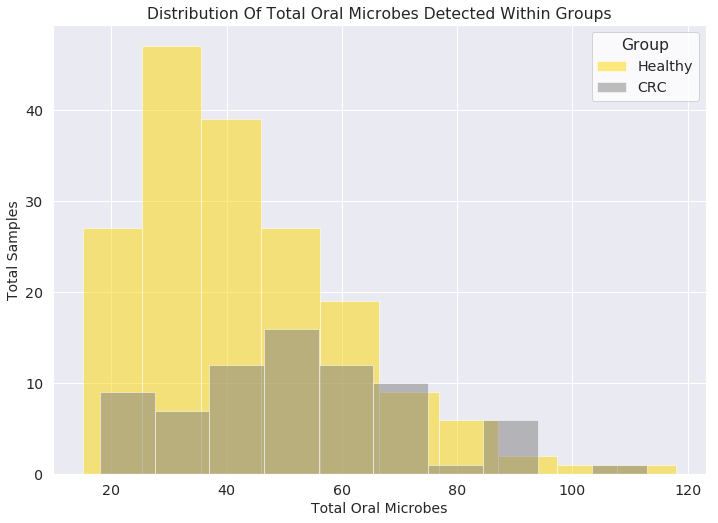

In [39]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 11.7,8.27
sns.set(font_scale=1.3)
plt.hist(TOBdf[TOBdf['Group']=='Healthy']['TOB'], bins=10, alpha=0.5, label="Healthy", color='gold')
plt.hist(TOBdf[TOBdf['Group']=='CRC']['TOB'], bins=10, alpha=0.5, label="CRC", color='grey')
plt.xlabel("Total Oral Microbes", size=14)
plt.ylabel("Total Samples", size=14)
plt.title("Distribution Of Total Oral Microbes Detected Within Groups")
plt.legend(loc='upper right', facecolor='white', title='Group')
#plt.savefig("oralMicrobe_richness.pdf", bbox_inches='tight', dpi=300)

In [40]:
crcGlobal = globalAbundanceDF[globalAbundanceDF['Cohort']=='CRC'].drop(columns=['Cohort']).dropna(axis=1,thresh=1)
HealthyGlobal = globalAbundanceDF[globalAbundanceDF['Cohort']=='Healthy'].drop(columns=['Cohort']).dropna(axis=1,thresh=1)

In [41]:
crcUnique = []
for species in list(crcGlobal.columns):
    if species in list(HealthyGlobal.columns):
        continue
    else:
        crcUnique.append(species)
print(len(crcUnique))

88


In [42]:
crcUniqueOralCount = []
for bacteria in crcUnique:
    if bacteria in OralMicrobeList:
        crcUniqueOralCount.append(bacteria)
    else:
        continue
crcUniqueOralCount

['Actinomyces_timonensis', 'Gemella_bergeri', 'Lactobacillus_panis']

In [43]:
# How many oral microbes are involved in negative associations
import dill

with open('./Files/negCRC.data', 'rb') as crcNeg:
    # read the data as binary data stream
    negCRCList = dill.load(crcNeg)
    
with open('./Files/negHealthy.data', 'rb') as healthyNeg:
    # read the data as binary data stream
    negHealthyList = dill.load(healthyNeg)

In [44]:
print(len(negCRCList))
print(len(negHealthyList))

28
8


In [45]:
crcOralNeg = []
for neg in negCRCList:
    for species in neg:
        if species in OralMicrobeList:
            print(neg)
            print(species)

('Lachnoclostridium_sp_YL32', 'Johnsonella_ignava')
Johnsonella_ignava
('Bacteroides_fluxus', 'Johnsonella_ignava')
Johnsonella_ignava
('Oscillibacter_sp_PEA192', 'Veillonella_dispar')
Veillonella_dispar
('Anaerotruncus_colihominis', 'Gemella_morbillorum')
Gemella_morbillorum
('Johnsonella_ignava', 'Clostridiales_bacterium_CCNA10')
Johnsonella_ignava
('Johnsonella_ignava', 'Clostridium_bolteae')
Johnsonella_ignava
('Haemophilus_parainfluenzae', 'Clostridium_phoceensis')
Haemophilus_parainfluenzae
('Solobacterium_moorei', 'Phascolarctobacterium_succinatutens')
Solobacterium_moorei


In [46]:
crcOralNeg = []
for neg in negHealthyList:
    for species in neg:
        if species in OralMicrobeList:
            print(species)

## Perform Alpha Diversity (Simpson Index of Diversity)

In [47]:
dfo2 = globalAbundanceDF.drop(columns=['Cohort']).div(globalAbundanceDF.sum(axis=1), axis=0).copy()            
globalAbundanceDFCount = dfo2.multiply(1000000, axis=0).copy()     
globalAbundanceDFCount2 = globalAbundanceDFCount.copy()
globalAbundanceDFCount.fillna(0, inplace=True)
for x in globalAbundanceDFCount.columns:
    for y in globalAbundanceDFCount.index:
        globalAbundanceDFCount2.at[y,x] = int(globalAbundanceDFCount.at[y,x])
globalAbundanceDFCount2.replace(0.0, np.nan, inplace=True)
globalAbundanceDFCount2.head()

,Abiotrophia_defectiva,Absiella_dolichum,Acetanaerobacterium_elongatum,Acetitomaculum_ruminis,Acetivibrio_ethanolgignens,Acholeplasma_axanthum,Acholeplasma_brassicae,Acholeplasma_modicum,Acidaminococcus_fermentans,Acidaminococcus_intestini,...,Yersinia_rohdei,Yersinia_ruckeri,Yokenella_regensburgei,Youngiibacter_fragilis,Zhihengliuella_sp_ISTPL4,bacterium_A52C2,bacterium_LF-3,bacterium_MS4,endosymbiont_TC1_of_Trimyema_compressum,nan
SampleName,,,,,,,,,,,,,,,,,,,,,
DRR127524,14.0,686.0,NaN,NaN,144.0,NaN,NaN,NaN,20.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,119.0,NaN,NaN,NaN
DRR127532,NaN,152.0,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN
DRR127535,NaN,140.0,NaN,NaN,197.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,356.0,NaN,NaN,NaN
DRR127537,NaN,29.0,NaN,NaN,14.0,NaN,NaN,NaN,1347.0,680.0,...,NaN,NaN,NaN,NaN,NaN,NaN,75.0,NaN,NaN,NaN
DRR127546,NaN,748.0,NaN,NaN,292.0,NaN,NaN,NaN,NaN,38.0,...,NaN,NaN,NaN,NaN,NaN,19.0,534.0,NaN,NaN,NaN


In [48]:
#1-Dominance
def runSimpson(df):
    from tqdm import tqdm
    sampleDic = {"Sample":[], "Simpson":[], "Cohort":[]}
    
    df2 = df.copy()
    
    for sample in df2.index:
        Top = 0
        Bottom = 1000000*(999999)
        D = 0
        
        for species in list(df2.loc[sample].dropna().index):
            Top += df2.at[sample,species]*(df2.at[sample,species]-1)
    
        D = (1-(Top/Bottom))

        sampleDic["Sample"].append(sample)
        sampleDic["Simpson"].append(D)
        sampleDic["Cohort"].append(globalAbundanceDF.loc[sample]['Cohort'])
        
    shannonDF = pd.DataFrame(data=sampleDic).set_index("Sample")
    swiDF = shannonDF[['Simpson','Cohort']].copy()
    return(swiDF)

In [49]:
simpsonDF = runSimpson(globalAbundanceDFCount2)
simpsonDF.head()

,Simpson,Cohort
Sample,,
DRR127524,0.753530,Healthy
DRR127532,0.953457,Healthy
DRR127535,0.825508,Healthy
DRR127537,0.932765,Healthy
DRR127546,0.941352,Healthy


In [150]:
simpsonDF[simpsonDF['Cohort']=='Healthy'].min()

Simpson    0.32611
Cohort     Healthy
dtype: object

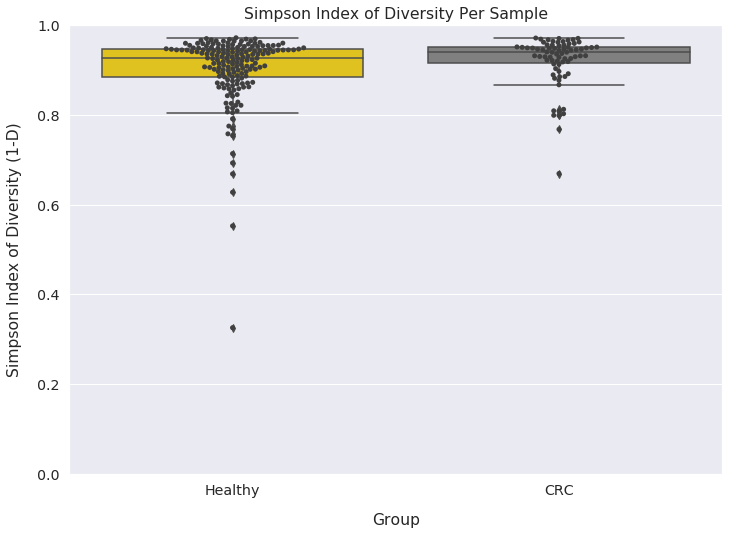

In [152]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27
sns.set(font_scale=1.3)
palette ={'Healthy':'gold', 'CRC':'grey'}
coList = set(simpsonDF.Cohort)
        
meanss = {}
for nation in coList:
    meanss[nation] = simpsonDF[simpsonDF['Cohort']== nation]['Simpson'].median()
meanss
order = sorted(meanss, key=meanss.get)

ax = sns.boxplot(x='Cohort', y='Simpson', hue="Cohort", data=simpsonDF, palette=palette, dodge=False, order=order)
ax = sns.swarmplot(x="Cohort", y="Simpson", data=simpsonDF, color=".25", order=order)

ax.set_title('Simpson Index of Diversity Per Sample')
ax.set_ylabel('Simpson Index of Diversity (1-D)', labelpad=15)
ax.set_xlabel('Group', labelpad=15)
ax.set_xticklabels(ax.get_xticklabels())

ax.set(ylim=(0, 1))

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, prop={'size': 14}, title = 'Group')
ax.get_legend().remove()

plt.savefig("/home/mark/Desktop/simpsonDiversity.png", bbox_inches='tight', dpi=300)
plt.show()

## Perform Alpha Diversity (SHANNON WEINER INDEX)

In [51]:
#H = -p(i)*log(pi)
def runShannon(df):
    from tqdm import tqdm
    sampleDic = {"Sample":[], "ShannonWienerIndex":[], "Cohort":[]}
    df2 = df.copy()
    for sample in tqdm(df2.index):
        H = 0
        for column in list(df2.loc[sample].dropna().index):
            if column != 'Cohort':
                H += (df2.at[sample, column]*math.log(df2.at[sample, column]))

        H = H*-1

        sampleDic["Sample"].append(sample)
        sampleDic["ShannonWienerIndex"].append(H)
        sampleDic["Cohort"].append(globalAbundanceDF.loc[sample]['Cohort'])
        
    shannonDF = pd.DataFrame(data=sampleDic).set_index("Sample")
    swiDF = shannonDF[['ShannonWienerIndex','Cohort']].copy()
    return(swiDF)

In [52]:
globalAbundanceDF.head()

,Abiotrophia_defectiva,Absiella_dolichum,Acetanaerobacterium_elongatum,Acetitomaculum_ruminis,Acetivibrio_ethanolgignens,Acholeplasma_axanthum,Acholeplasma_brassicae,Acholeplasma_modicum,Acidaminococcus_fermentans,Acidaminococcus_intestini,...,Yersinia_rohdei,Yersinia_ruckeri,Yokenella_regensburgei,Youngiibacter_fragilis,Zhihengliuella_sp_ISTPL4,bacterium_A52C2,bacterium_LF-3,bacterium_MS4,endosymbiont_TC1_of_Trimyema_compressum,nan
SampleName,,,,,,,,,,,,,,,,,,,,,
DRR127524,0.000015,0.000685,NaN,NaN,0.000144,NaN,NaN,NaN,0.000021,0.000100,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000119,NaN,NaN,NaN
DRR127532,NaN,0.000152,NaN,NaN,0.000062,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000041,NaN,NaN,NaN
DRR127535,NaN,0.000140,NaN,NaN,0.000197,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000356,NaN,NaN,NaN
DRR127537,NaN,0.000029,NaN,NaN,0.000015,NaN,NaN,NaN,0.001345,0.000680,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000076,NaN,NaN,NaN
DRR127546,NaN,0.000747,NaN,NaN,0.000292,NaN,NaN,NaN,NaN,0.000038,...,NaN,NaN,NaN,NaN,NaN,0.000019,0.000533,NaN,NaN,NaN


In [53]:
swiDF = runShannon(globalAbundanceDF)

100%|██████████| 252/252 [00:02<00:00, 95.89it/s] 


In [54]:
swiDF.head()

,ShannonWienerIndex,Cohort
Sample,,
DRR127524,2.752384,Healthy
DRR127532,3.657553,Healthy
DRR127535,2.911839,Healthy
DRR127537,3.242895,Healthy
DRR127546,3.514093,Healthy


## Plot Results

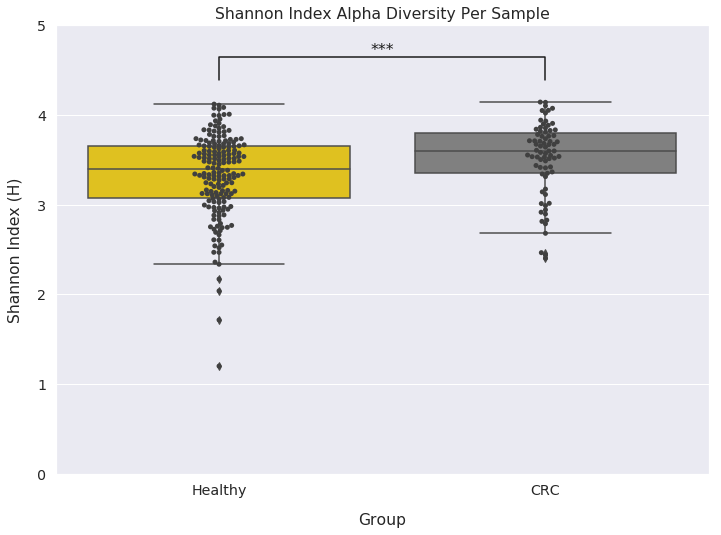

In [55]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27
sns.set(font_scale=1.3)
coList = set(swiDF.Cohort)
palette ={'Healthy':'gold', 'CRC':'grey'}

meanss = {}
for nation in coList:
    meanss[nation] = swiDF[swiDF['Cohort']== nation]['ShannonWienerIndex'].median()
meanss
order = sorted(meanss, key=meanss.get)

ax = sns.boxplot(x='Cohort', y='ShannonWienerIndex', hue="Cohort", data=swiDF, palette=palette, dodge=False, order=order)
ax = sns.swarmplot(x="Cohort", y="ShannonWienerIndex", data=swiDF, color=".25", order=order)

ax.set_title('Shannon Index Alpha Diversity Per Sample')
ax.set_ylabel('Shannon Index (H)', labelpad=15)
ax.set_xlabel('Group', labelpad=15)
ax.set_xticklabels(ax.get_xticklabels())

ax.set(ylim=(0, 5))

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, prop={'size': 14}, title = 'Group')
ax.get_legend().remove()

x1, x2 = 0, 1
y, h, col = swiDF['ShannonWienerIndex'][swiDF['Cohort']=='CRC'].max() + .25, .25, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)

#plt.savefig("alphaDiversity.png", bbox_inches='tight', dpi=300)
plt.show()

In [56]:
stats.mannwhitneyu(list(swiDF[swiDF['Cohort']=='Healthy']['ShannonWienerIndex']),list(swiDF[swiDF['Cohort']=='CRC']['ShannonWienerIndex']), alternative="two-sided") 

MannwhitneyuResult(statistic=4845.0, pvalue=0.0009573436106496914)

In [57]:
from scipy.stats import ranksums
stats.ranksums(list(swiDF[swiDF['Cohort']=='Healthy']['ShannonWienerIndex']),list(swiDF[swiDF['Cohort']=='CRC']['ShannonWienerIndex'])) 

RanksumsResult(statistic=-3.30372030475301, pvalue=0.0009541097072157841)

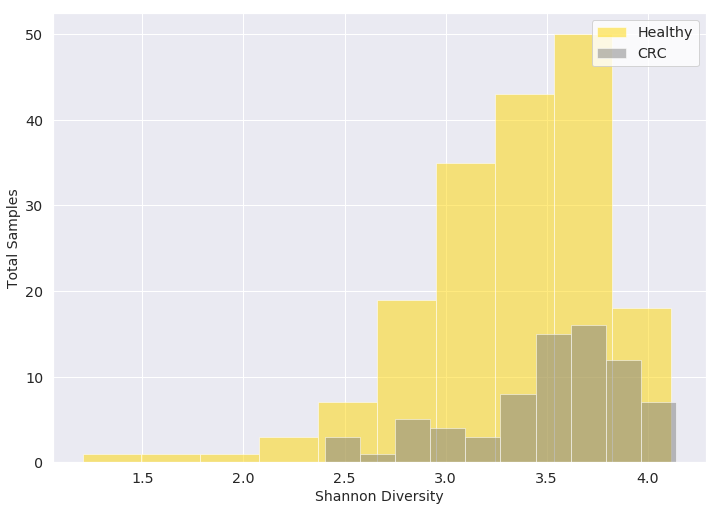

In [58]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 11.7,8.27
sns.set(font_scale=1.3)
plt.hist(swiDF[swiDF['Cohort']=='Healthy']['ShannonWienerIndex'], bins=10, alpha=0.5, label="Healthy", color='gold')
plt.hist(swiDF[swiDF['Cohort']=='CRC']['ShannonWienerIndex'], bins=10, alpha=0.5, label="CRC", color='grey')
plt.xlabel("Shannon Diversity", size=14)
plt.ylabel("Total Samples", size=14)
plt.legend(loc='upper right', facecolor='white')
#plt.savefig("oralMicrobe_richness.png", bbox_inches='tight', dpi=300)

## Plot Total Strain Richness

In [59]:
#H = -p(i)*log(pi)
def runSpeciesRichness(df):
    from tqdm import tqdm
    sampleDic = {"Sample":[], "Species_Richness":[], "Cohort":[]}
    df2 = df.copy()
    for sample in tqdm(df2.index):
        sampleDic["Sample"].append(sample)
        #Subtract 1 for cohort column
        sampleDic["Species_Richness"].append(len(list(df2.loc[sample].dropna().index))-1)
        sampleDic["Cohort"].append(df2.at[sample, 'Cohort'])
        
    richDF = pd.DataFrame(data=sampleDic).set_index("Sample")
    riDF = richDF[['Species_Richness','Cohort']].copy()
    return(riDF)

In [60]:
speciesRichDF = runSpeciesRichness(globalAbundanceDF)

100%|██████████| 252/252 [00:00<00:00, 459.58it/s]


In [61]:
speciesRichDF.head()

,Species_Richness,Cohort
Sample,,
DRR127524,370,Healthy
DRR127532,347,Healthy
DRR127535,290,Healthy
DRR127537,305,Healthy
DRR127546,336,Healthy


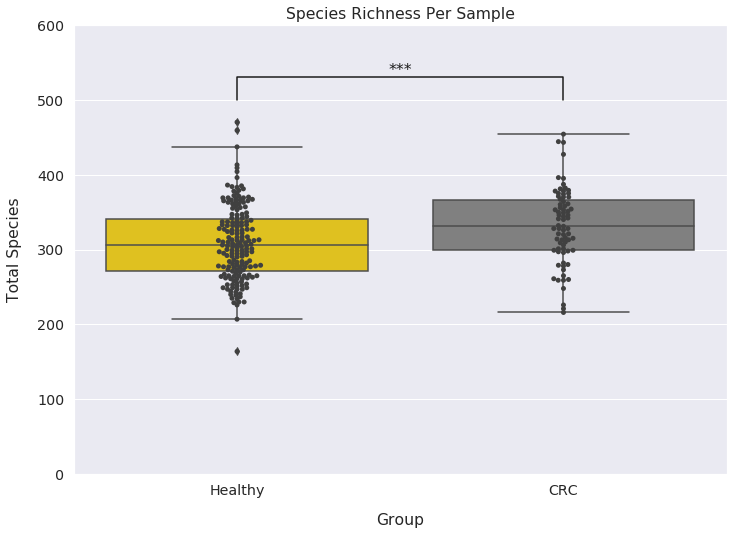

In [62]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27
sns.set(font_scale=1.3)
coList = set(speciesRichDF.Cohort)
        
meanss = {}
for nation in coList:
    meanss[nation] = speciesRichDF[speciesRichDF['Cohort']== nation]['Species_Richness'].median()
meanss
order = sorted(meanss, key=meanss.get)

ax = sns.boxplot(x='Cohort', y='Species_Richness', hue="Cohort", data=speciesRichDF, palette=palette, dodge=False, order=order)
ax = sns.swarmplot(x="Cohort", y="Species_Richness", data=speciesRichDF, color=".25", order=order)

ax.set_title('Species Richness Per Sample')
ax.set_ylabel('Total Species', labelpad=15)
ax.set_xlabel('Group', labelpad=15)
ax.set_xticklabels(ax.get_xticklabels())

ax.set(ylim=(0, 600))


# Put the legend out of the figure
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, prop={'size': 14}, title = 'Group')
ax.get_legend().remove()

x1, x2 = 0, 1
y, h, col = speciesRichDF['Species_Richness'].max() + 30, 30, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)

#plt.savefig("Species_Richness.png", bbox_inches='tight', dpi=300)
plt.show()

In [63]:
stats.mannwhitneyu(list(swiDF[swiDF['Cohort']=='Healthy']['ShannonWienerIndex']),list(swiDF[swiDF['Cohort']=='CRC']['ShannonWienerIndex']), alternative="two-sided") 

MannwhitneyuResult(statistic=4845.0, pvalue=0.0009573436106496914)

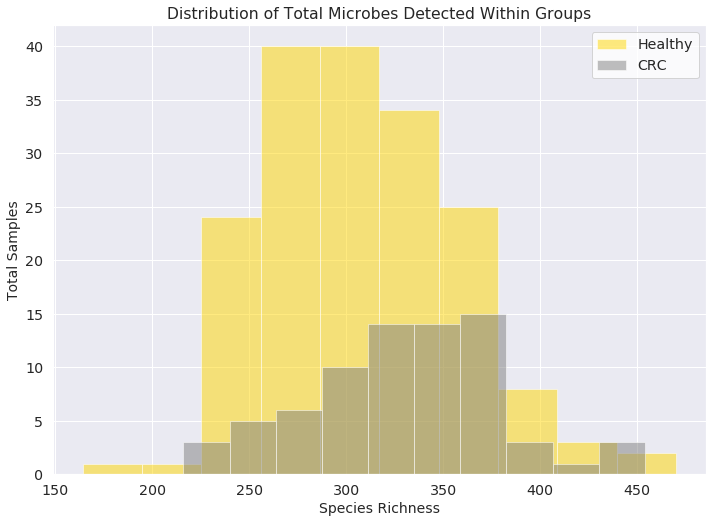

In [132]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 11.7,8.27
sns.set(font_scale=1.3)
plt.hist(speciesRichDF[speciesRichDF['Cohort']=='Healthy']['Species_Richness'], bins=10, alpha=0.5, label="Healthy", color='gold')
plt.hist(speciesRichDF[speciesRichDF['Cohort']=='CRC']['Species_Richness'], bins=10, alpha=0.5, label="CRC", color='grey')
plt.xlabel("Species Richness", size=14)
plt.ylabel("Total Samples", size=14)
plt.title("Distribution of Total Microbes Detected Within Groups")
plt.legend(loc='upper right', facecolor='white')
#plt.savefig("oralMicrobe_richness.png", bbox_inches='tight', dpi=300)

## Plot The Effective Number of Species

In [65]:
#H = -p(i)*log(pi)
def runEFNS(df):
    from tqdm import tqdm
    sampleDic = {"Sample":[], "EFNS":[], "Cohort":[]}
    df2 = df.copy()
    for sample in tqdm(df2.index):
        sampleDic["Sample"].append(sample)
        sampleDic["EFNS"].append(np.exp(df2.at[sample,'ShannonWienerIndex']))
        sampleDic["Cohort"].append(df2.at[sample,'Cohort'])
        
    efnsDF = pd.DataFrame(data=sampleDic).set_index("Sample")
    efDF = efnsDF[['EFNS','Cohort']].copy()
    return(efDF)

In [66]:
EFNS_DF = runEFNS(swiDF)

100%|██████████| 252/252 [00:00<00:00, 29858.60it/s]


In [67]:
EFNS_DF.head()

,EFNS,Cohort
Sample,,
DRR127524,15.679968,Healthy
DRR127532,38.766374,Healthy
DRR127535,18.390581,Healthy
DRR127537,25.607749,Healthy
DRR127546,33.585453,Healthy


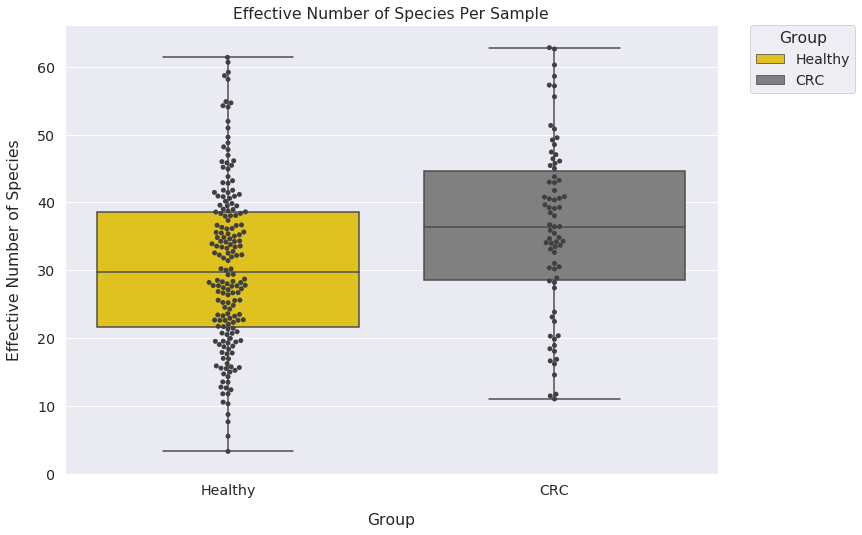

In [68]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27
sns.set(font_scale=1.3)
coList = set(EFNS_DF.Cohort)
        
meanss = {}
for nation in coList:
    meanss[nation] = EFNS_DF[EFNS_DF['Cohort']== nation]['EFNS'].median()
meanss
order = sorted(meanss, key=meanss.get)

ax = sns.boxplot(x='Cohort', y='EFNS', hue="Cohort", data=EFNS_DF, palette=palette, dodge=False, order=order)
ax = sns.swarmplot(x="Cohort", y="EFNS", data=EFNS_DF, color=".25", order=order)

ax.set_title('Effective Number of Species Per Sample')
ax.set_ylabel('Effective Number of Species', labelpad=15)
ax.set_xlabel('Group', labelpad=15)
ax.set_xticklabels(ax.get_xticklabels())

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, prop={'size': 14}, title = 'Group')
#plt.savefig("Effective_NumberOfSpecies.png", bbox_inches='tight', dpi=300)
plt.show()

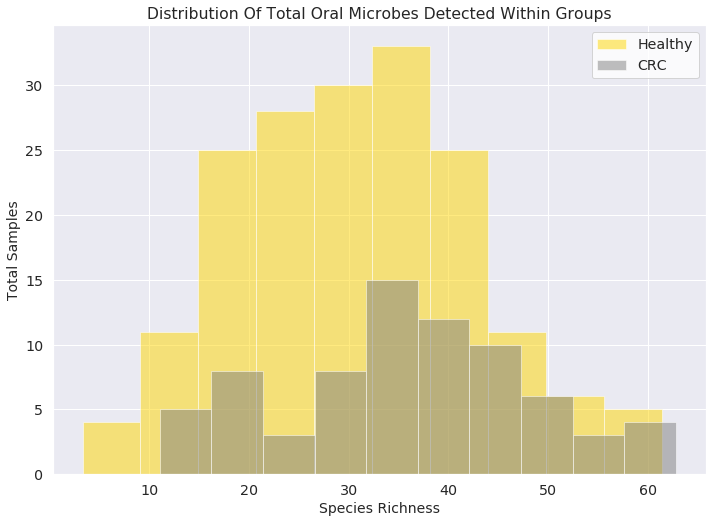

In [69]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 11.7,8.27
sns.set(font_scale=1.3)
plt.hist(EFNS_DF[EFNS_DF['Cohort']=='Healthy']['EFNS'], bins=10, alpha=0.5, label="Healthy", color='gold')
plt.hist(EFNS_DF[EFNS_DF['Cohort']=='CRC']['EFNS'], bins=10, alpha=0.5, label="CRC", color='grey')
plt.xlabel("Species Richness", size=14)
plt.ylabel("Total Samples", size=14)
plt.title("Distribution Of Total Oral Microbes Detected Within Groups")
plt.legend(loc='upper right', facecolor='white')
#plt.savefig("oralMicrobe_richness.png", bbox_inches='tight', dpi=300)

## Mann-Whitney U Test for STATSIG

In [70]:
def CompareDA(df):
    CRC_list = []
    Healthy_list = []
    
    for i in df.index:
        if float(df.at[i,'Healthy_Median']) > float(df.at[i,'CRC_Median']):
            Healthy_list.append(i)
        else:
            CRC_list.append(i)

    return(CRC_list, Healthy_list)

## Look at Differential abundance of species

In [71]:
# Test for statistical significance Mann-Whitney U Test
from statsmodels.stats.multitest import multipletests
import scipy
from scipy import stats
import os
import statistics
import statsmodels
import statsmodels.api as sm 
import random

def runMann_DA(df1, df2, alpha, correction):
    
    dfstat={'Species':[], "Healthy_Median":[], "Healthy_Distribution":[], "CRC_Median":[], "CRC_Distribution":[],'Test':[],'Test_Statistic':[],'P_Value':[]}
    
    dfHealthy = df1.copy()
    dfCRC = df2.copy()
    
    MTC_Value = float(alpha)/len(df2.columns)
    
    for species in list(dfHealthy.columns):
        dfstat['Species'].append(species)

        healthySpecies = list(reversed(sorted(list(dfHealthy[species]),key=float)))
        crcSpecies = list(reversed(sorted(list(dfCRC[species]),key=float)))

        #Check Data Distribution for Normalicy: based on D’Agostino and Pearson’s 
        try:
            nt1, np1 = stats.normaltest(healthySpecies)
            nt2, np2 = stats.normaltest(crcSpecies)

            if (np1 < alpha):
                    dfstat["Healthy_Distribution"].append('Not Normally Distributed')
            else:
                    dfstat["Healthy_Distribution"].append('Normally Distributed')

            if (np2 < alpha):
                    dfstat["CRC_Distribution"].append('Not Normally Distributed')
            else:
                    dfstat["CRC_Distribution"].append('Normally Distributed')


            (test_statistic, p_value) = stats.mannwhitneyu(healthySpecies,crcSpecies, alternative="two-sided") 

            dfstat["Healthy_Median"].append(statistics.median(healthySpecies))
            dfstat["CRC_Median"].append(statistics.median(crcSpecies))
            dfstat['Test'].append('Mann-Whitney U Test')
            dfstat['Test_Statistic'].append(test_statistic)
            dfstat['P_Value'].append(p_value)
        except:
            dfstat["Healthy_Distribution"].append('Not Enough Samples')
            dfstat["CRC_Distribution"].append('Not Enough Samples')
            dfstat["Healthy_Median"].append('Not Enough Samples')
            dfstat["CRC_Median"].append('Not Enough Samples')
            dfstat['Test'].append('Not Enough Samples')
            dfstat['Test_Statistic'].append('Not Enough Samples')
            dfstat['P_Value'].append('Not Enough Samples')

    # Perform multiple testing correction
    dfstat2 = pd.DataFrame(data=dfstat)
    dfstat3 = dfstat2.copy()
    FDRcorrectionList= multipletests(dfstat2['P_Value'], alpha=alpha, method=correction, is_sorted=False, returnsorted=False)
    dfstat3['Correction_Performed'] = correction
    dfstat3['Corrected_Pvalue'] = list(FDRcorrectionList[1])
    dfstat3['Reject'] = list(FDRcorrectionList[0])
    dfstat4 = dfstat3[dfstat3['Reject']==True].copy()
    return (dfstat4)

In [72]:
from skbio.stats.composition import clr

BothCohortAllSpecies = pd.read_csv('./Files/Dataframes/allCohorts_allSpecies.csv').set_index("SampleName")
BothCohortAllSpecies2 = BothCohortAllSpecies.drop(columns=['Cohort']).copy()
BothCohortAllSpecies2.fillna(0.0, inplace=True)
for row in (BothCohortAllSpecies2.index):
    BothCohortAllSpecies2.loc[row] = clr(np.array(BothCohortAllSpecies2.loc[row].replace(0.0, 1e-10)))
BothCohortAllSpecies2['Cohort'] = BothCohortAllSpecies['Cohort'].copy()

In [73]:
BothCohortAllSpecies2.head()

,Abiotrophia_defectiva,Absiella_dolichum,Acetanaerobacterium_elongatum,Acetitomaculum_ruminis,Acetivibrio_ethanolgignens,Acholeplasma_axanthum,Acholeplasma_brassicae,Acholeplasma_modicum,Acidaminococcus_fermentans,Acidaminococcus_intestini,...,Yersinia_ruckeri,Yokenella_regensburgei,Youngiibacter_fragilis,Zhihengliuella_sp_ISTPL4,bacterium_A52C2,bacterium_LF-3,bacterium_MS4,endosymbiont_TC1_of_Trimyema_compressum,nan,Cohort
SampleName,,,,,,,,,,,,,,,,,,,,,
DRR127524,8.038720,11.862796,-3.876613,-3.876613,10.302841,-3.876613,-3.876613,-3.876613,8.362626,9.936710,...,-3.876613,-3.876613,-3.876613,-3.876613,-3.876613,10.114360,-3.876613,-3.876613,-3.876613,Healthy
DRR127532,-3.695015,10.540819,-3.695015,-3.695015,9.647560,-3.695015,-3.695015,-3.695015,-3.695015,-3.695015,...,-3.695015,-3.695015,-3.695015,-3.695015,-3.695015,9.222467,-3.695015,-3.695015,-3.695015,Healthy
DRR127535,-3.066775,11.086785,-3.066775,-3.066775,11.425029,-3.066775,-3.066775,-3.066775,-3.066775,-3.066775,...,-3.066775,-3.066775,-3.066775,-3.066775,-3.066775,12.019078,-3.066775,-3.066775,-3.066775,Healthy
DRR127537,-3.163016,9.426443,-3.163016,-3.163016,8.731307,-3.163016,-3.163016,-3.163016,13.251796,12.569130,...,-3.163016,-3.163016,-3.163016,-3.163016,-3.163016,10.371629,-3.163016,-3.163016,-3.163016,Healthy
DRR127546,-3.530373,12.296342,-3.530373,-3.530373,11.356320,-3.530373,-3.530373,-3.530373,-3.530373,9.315752,...,-3.530373,-3.530373,-3.530373,-3.530373,8.626042,11.958482,-3.530373,-3.530373,-3.530373,Healthy


In [74]:
da_crc = BothCohortAllSpecies2[BothCohortAllSpecies2['Cohort']=='CRC'].drop(columns=['Cohort']).copy()
da_healthy = BothCohortAllSpecies2[BothCohortAllSpecies2['Cohort']=='Healthy'].drop(columns=['Cohort']).copy()

In [75]:
daSpecies = runMann_DA(da_healthy,da_crc, 0.05, 'fdr_bh')
daSpecies2 = daSpecies.set_index("Species").sort_values(by=['Corrected_Pvalue']).copy()

In [76]:
print(daSpecies2.shape)

(938, 10)


In [77]:
daSpecies2

,Healthy_Median,Healthy_Distribution,CRC_Median,CRC_Distribution,Test,Test_Statistic,P_Value,Correction_Performed,Corrected_Pvalue,Reject
Species,,,,,,,,,,
Parvimonas_micra,2.991341,Normally Distributed,10.527700,Not Normally Distributed,Mann-Whitney U Test,2888.0,2.277013e-12,fdr_bh,3.096737e-09,True
Peptostreptococcus_stomatis,-2.576004,Normally Distributed,10.290050,Not Normally Distributed,Mann-Whitney U Test,3145.0,6.634730e-11,fdr_bh,4.511617e-08,True
Gemella_morbillorum,-2.686775,Normally Distributed,9.731965,Not Normally Distributed,Mann-Whitney U Test,3178.0,1.005849e-10,fdr_bh,4.559847e-08,True
Fusobacterium_nucleatum,-3.113394,Not Normally Distributed,9.405304,Not Normally Distributed,Mann-Whitney U Test,3465.0,3.190989e-09,fdr_bh,1.084936e-06,True
Acetanaerobacterium_elongatum,-3.218894,Not Normally Distributed,-3.569749,Normally Distributed,Mann-Whitney U Test,8614.0,1.193865e-04,fdr_bh,1.136555e-03,True
Kosakonia_radicincitans,-3.218894,Not Normally Distributed,-3.569749,Not Normally Distributed,Mann-Whitney U Test,8534.0,2.193901e-04,fdr_bh,1.136555e-03,True
Kosakonia_sacchari,-3.218692,Not Normally Distributed,-3.569749,Not Normally Distributed,Mann-Whitney U Test,8599.0,1.340380e-04,fdr_bh,1.136555e-03,True
Kosakonia_sp_CCTCC_M2018092,-3.237587,Not Normally Distributed,-3.569749,Normally Distributed,Mann-Whitney U Test,8492.0,2.993344e-04,fdr_bh,1.136555e-03,True
Lachnospira_multipara,-2.775268,Not Normally Distributed,-3.354860,Not Normally Distributed,Mann-Whitney U Test,8694.0,6.355952e-05,fdr_bh,1.136555e-03,True


(array([279.25274219,  41.84521213,  16.65268646,   7.68585529,
          5.97788745,   5.12390353,   8.11284725,   2.98894372,
          3.84292764,   3.84292764,   5.12390353,   2.98894372,
          1.70796784,   2.1349598 ,   2.1349598 ,   2.56195176,
          0.85398392,   2.56195176,   1.70796784,   3.41593568]),
 array([3.09673734e-09, 2.49676692e-03, 4.99353075e-03, 7.49029457e-03,
        9.98705840e-03, 1.24838222e-02, 1.49805861e-02, 1.74773499e-02,
        1.99741137e-02, 2.24708775e-02, 2.49676414e-02, 2.74644052e-02,
        2.99611690e-02, 3.24579328e-02, 3.49546967e-02, 3.74514605e-02,
        3.99482243e-02, 4.24449881e-02, 4.49417520e-02, 4.74385158e-02,
        4.99352796e-02]),
 <a list of 20 Patch objects>)

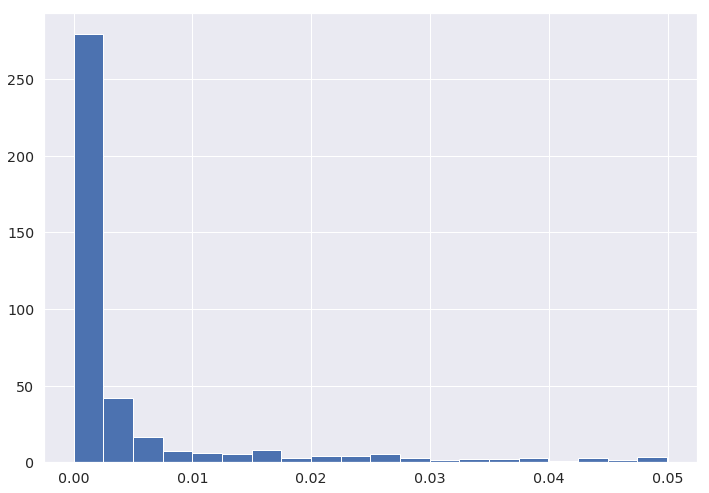

In [78]:
plt.hist(daSpecies2['Corrected_Pvalue'], bins=20, density=True)

In [79]:
allPrevalence = pd.read_csv("./Files/Dataframes/allCohorts_speciesPrevalence.csv").set_index("Bacterial_Species")
allPrevalence.head()
speciesabove10Percent = list(set(list(allPrevalence[allPrevalence['Prevalence']>.1].index)))

In [80]:
allSpeciesCRC = BothCohortAllSpecies[BothCohortAllSpecies['Cohort']=='CRC'].replace(0.0, np.nan).copy()
allSpeciesHealthy = BothCohortAllSpecies[BothCohortAllSpecies['Cohort']=='Healthy'].replace(0.0, np.nan).copy()

In [81]:
crcPresentSpecies = list(allSpeciesCRC.dropna(thresh=1, axis=1).columns)
HealthyPresentSpecies = list(allSpeciesHealthy.dropna(thresh=1, axis=1).columns)

In [82]:
bothCohortSpecies = []
bothCohortSpecies2 = []

for x in list(allSpeciesCRC.columns):
    if x in HealthyPresentSpecies and x in crcPresentSpecies and x in speciesabove10Percent:
        bothCohortSpecies.append(x)
print(len(bothCohortSpecies))

600


In [83]:
for x in list(allSpeciesCRC.columns):
    if x in speciesabove10Percent:
        bothCohortSpecies2.append(x)
print(len(bothCohortSpecies2))

600


In [84]:
bothLists = bothCohortSpecies+bothCohortSpecies2
from collections import Counter
counted = Counter(bothLists)

In [85]:
goodSpecies = []
for x in daSpecies2.index:
    if x in list(counted.keys()):
        goodSpecies.append(x)

In [86]:
daSpecies3  = daSpecies2.loc[goodSpecies].copy()

In [87]:
highCRCSpecies, highHealthySpecies = CompareDA(daSpecies3)

In [88]:
highCRCSpecies

['Parvimonas_micra',
 'Peptostreptococcus_stomatis',
 'Gemella_morbillorum',
 'Fusobacterium_nucleatum',
 'Streptococcus_anginosus',
 'Dialister_pneumosintes',
 'Peptostreptococcus_anaerobius',
 'Streptococcus_sp_KCOM_2412',
 'Ruminococcus_torques',
 'Filifactor_alocis']

In [89]:
print(len(highHealthySpecies))

174


In [90]:
highHealthySpecies

['Lachnospira_multipara',
 'Kluyvera_ascorbata',
 'Lactobacillus_rogosae',
 'Lactobacillus_delbrueckii',
 'Denitrobacterium_detoxificans',
 'Escherichia_fergusonii',
 'Enterorhabdus_mucosicola',
 'Veillonella_seminalis',
 'Roseburia_faecis',
 'Citrobacter_youngae',
 'Anaerosporobacter_mobilis',
 'Citrobacter_portucalensis',
 'Citrobacter_freundii_complex_sp_CFNIH9',
 'Citrobacter_freundii_complex_sp_CFNIH4',
 'Citrobacter_freundii_complex_sp_CFNIH3',
 'Clostridium_cocleatum',
 'Clostridium_baratii',
 'Clostridium_perfringens',
 'Acetivibrio_ethanolgignens',
 'Acetitomaculum_ruminis',
 'Clostridium_sartagoforme',
 'Facklamia_languida',
 'Lelliottia_nimipressuralis',
 'Clostridium_sphenoides',
 'Enterobacter_sp_Crenshaw',
 'Kluyvera_cryocrescens',
 'Streptococcus_lutetiensis',
 'Bacteroides_pectinophilus',
 'Actinomyces_viscosus',
 'Enterobacter_cloacae_complex_sp',
 'Pseudobutyrivibrio_ruminis',
 'Enterobacter_sp_E20',
 'Clostridium_saccharolyticum',
 'Anaerofustis_stercorihominis',
 'M

In [91]:
PullThese = highCRCSpecies

In [92]:
Top10species = daSpecies3.loc[PullThese].copy()
showDF = Top10species[['Healthy_Median','CRC_Median','Corrected_Pvalue']].sort_values(by='Corrected_Pvalue').copy()

In [93]:
showDF.rename(columns={'Healthy_Median':'Healthy Median','CRC_Median':'CRC Median','Corrected_Pvalue':'qvalue'}, inplace=True)

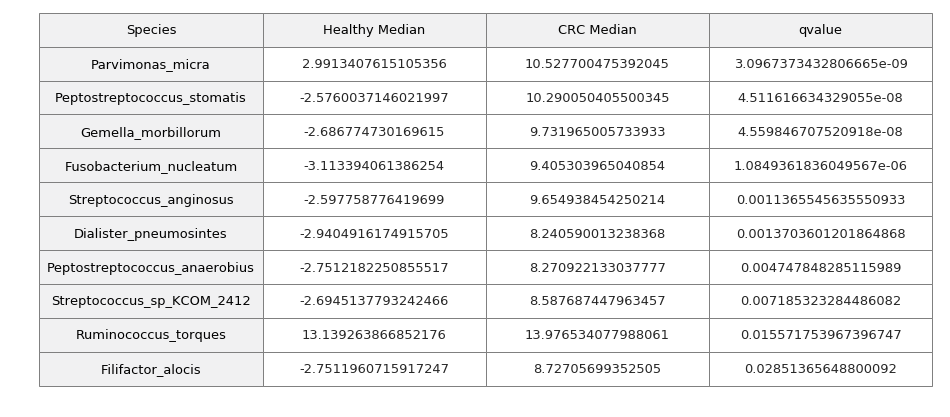

In [94]:
import six
def render_mpl_table(data, col_width=1.0, row_height=0.625, font_size=13,
                     header_color='#f1f1f2', row_colors=['w', 'w'], edge_color='grey',
                     bbox=[0, 0, 1, 1], header_columns=0, 
                     ax=None, **kwargs):
    
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    tab_2 = []
    for i in data.values:
        numm = 0
        tempList = []
        for j in i:
            if numm < 3:
                tempList.append(j)
            else:
                tempList.append(j)
            numm+=1
        tab_2.append(tempList)
        
    mpl_table = ax.table(cellText=tab_2, bbox=bbox, colLabels=data.columns, cellLoc='center', **kwargs)
    
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='normal', color='black', )
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
            
    return ax

fig = render_mpl_table(showDF.reset_index(), header_columns=1, col_width=4.0)
plt.savefig("CRCElevatedSpeciesTable.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [95]:
allPrevalence = pd.read_csv("./Files/Dataframes/allCohorts_speciesPrevalence.csv")
rowList = []
for row in allPrevalence.index:
    if allPrevalence.at[row,'Bacterial_Species'] in PullThese:
        rowList.append(row)

Text(0.5,0,'Species')

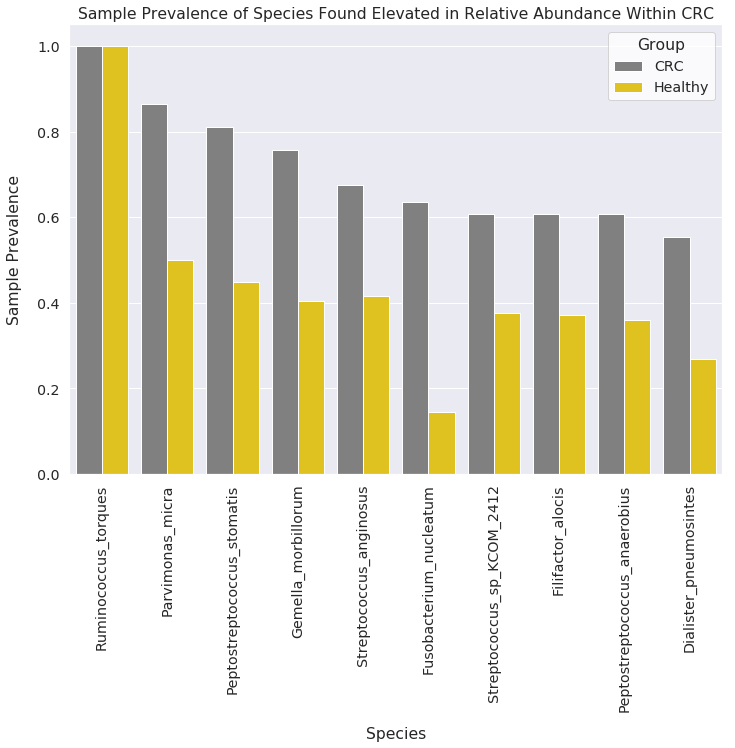

In [96]:
palette ={"Healthy":'gold', "CRC":'grey'}
from matplotlib import rcParams

rcParams['figure.figsize'] = 11.7,8.27
ax = sns.barplot(x="Bacterial_Species", y="Prevalence", hue="Cohort",palette=palette, data=allPrevalence.iloc[rowList].sort_values(by=['Prevalence'], ascending=False))
plt.xticks(rotation=90)
plt.legend(title='Group', facecolor='w')
ax.set_title('Sample Prevalence of Species Found Elevated in Relative Abundance Within CRC')
ax.set_ylabel('Sample Prevalence', labelpad=15)
ax.set_xlabel('Species', labelpad=15)
#plt.savefig("CRCElevatedSpeciesPrevalence.pdf", dpi=300, bbox_inches='tight')

In [97]:
allSpeciesAbundances = pd.read_csv("./Files/Dataframes/allCohorts_allSpecies.csv")

In [98]:
allSpeciesAbundances.replace(0.0, np.nan, inplace=True)

In [99]:
crcAllSpecies = allSpeciesAbundances[allSpeciesAbundances['Cohort']=='CRC'][PullThese].copy()
healthyAllSpecies = allSpeciesAbundances[allSpeciesAbundances['Cohort']=='Healthy'][PullThese].copy()

In [100]:
def buildAbundanceDF(df, groupName):
    df2 = df.copy()
    tempDict = {'Species':[],'Mean_Abundance':[],'Cohort':[]}
    
    for i in df2.columns:
        tempDict['Species'].append(i)
        tempDict['Mean_Abundance'].append(df2[i].dropna().median())
        tempDict['Cohort'].append(groupName)
        
    tempDF = pd.DataFrame(data=tempDict)
    return tempDF

In [101]:
crcAbundance = buildAbundanceDF(crcAllSpecies, "CRC")
healthyAbundance = buildAbundanceDF(healthyAllSpecies, "Healthy")
combineAbundance = pd.concat([crcAbundance,healthyAbundance])

In [102]:
combineAbundance.fillna(0.0, inplace=True)
combineAbundance.sort_values(by='Mean_Abundance', ascending=False, inplace=True)

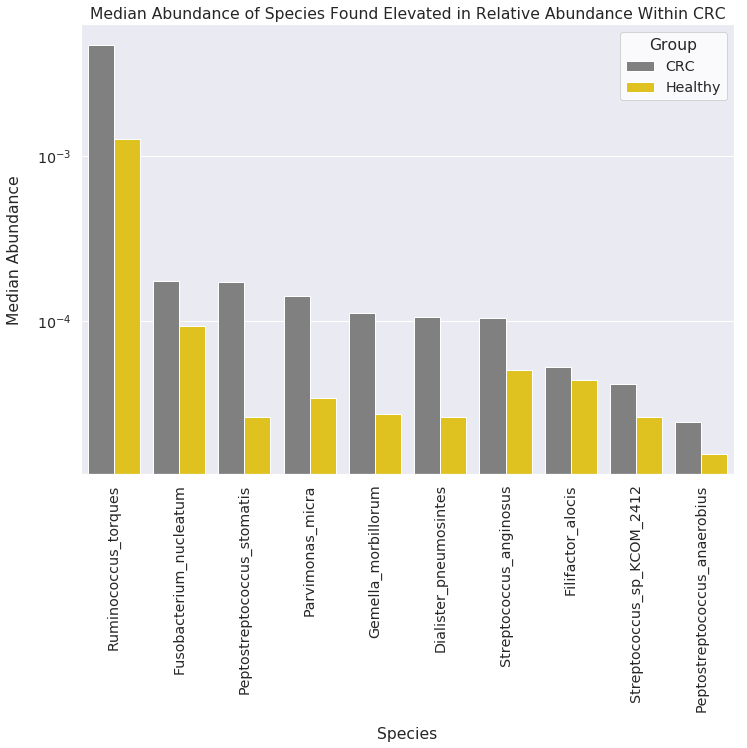

In [103]:
palette ={"Healthy":'gold', "CRC":'grey'}
ax = sns.barplot(x="Species", y="Mean_Abundance", hue="Cohort",palette=palette, data=combineAbundance)
ax.set_yscale("log")
plt.xticks(rotation=90)
plt.legend(title='Group',facecolor='w')
ax.set_title('Median Abundance of Species Found Elevated in Relative Abundance Within CRC')
ax.set_ylabel('Median Abundance', labelpad=15)
ax.set_xlabel('Species', labelpad=15)
plt.savefig("./Files/CRCElevatedSpeciesAbundance.pdf", dpi=300, bbox_inches='tight')

## Run with thresholds

In [104]:
accTaxDictDF = pd.read_csv("./Files/Dataframes/Master_Rename.csv").set_index("Bacterial_Strain")
accTaxDictDF['Species'] = accTaxDictDF['Species'].astype(str)
accTaxDictDF.head()

accTaxDictDF2 = accTaxDictDF.reset_index().set_index("Species").copy()

accTaxDictDF3 = accTaxDictDF2.loc[~accTaxDictDF2.index.duplicated(keep='first')].copy()

In [105]:
def inspectNodes(speciesList):    
    generaList = []

    for i in speciesList:
        generaList.append((accTaxDictDF3.at[i.replace(".","-"), 'Genus']))
    
    generaList2 = {x:0 for x in list(set(generaList))}

    for x in speciesList:
        generaList2[(accTaxDictDF3.at[x.replace(".","-"), 'Genus'])] +=1
    
            
    return (generaList2)

In [106]:
print(len(highHealthySpecies))

174


In [107]:
healthyGenera = inspectNodes(highHealthySpecies)
tempDF = pd.DataFrame(index=list(healthyGenera.keys()), columns=['Count']).fillna(0.0)
for x in healthyGenera.keys():
    tempDF.at[x,'Count']+=healthyGenera[x]/174
temp2 = tempDF.sort_values(by=['Count'], ascending=False).copy()
temp2.head()

,Count
Enterobacter,0.068966
Klebsiella,0.063218
Streptococcus,0.051724
Lactobacillus,0.051724
Citrobacter,0.045977


Text(0.5,1,'Genera of Species Significantly Elevated in Healthy Gut Microbiome')

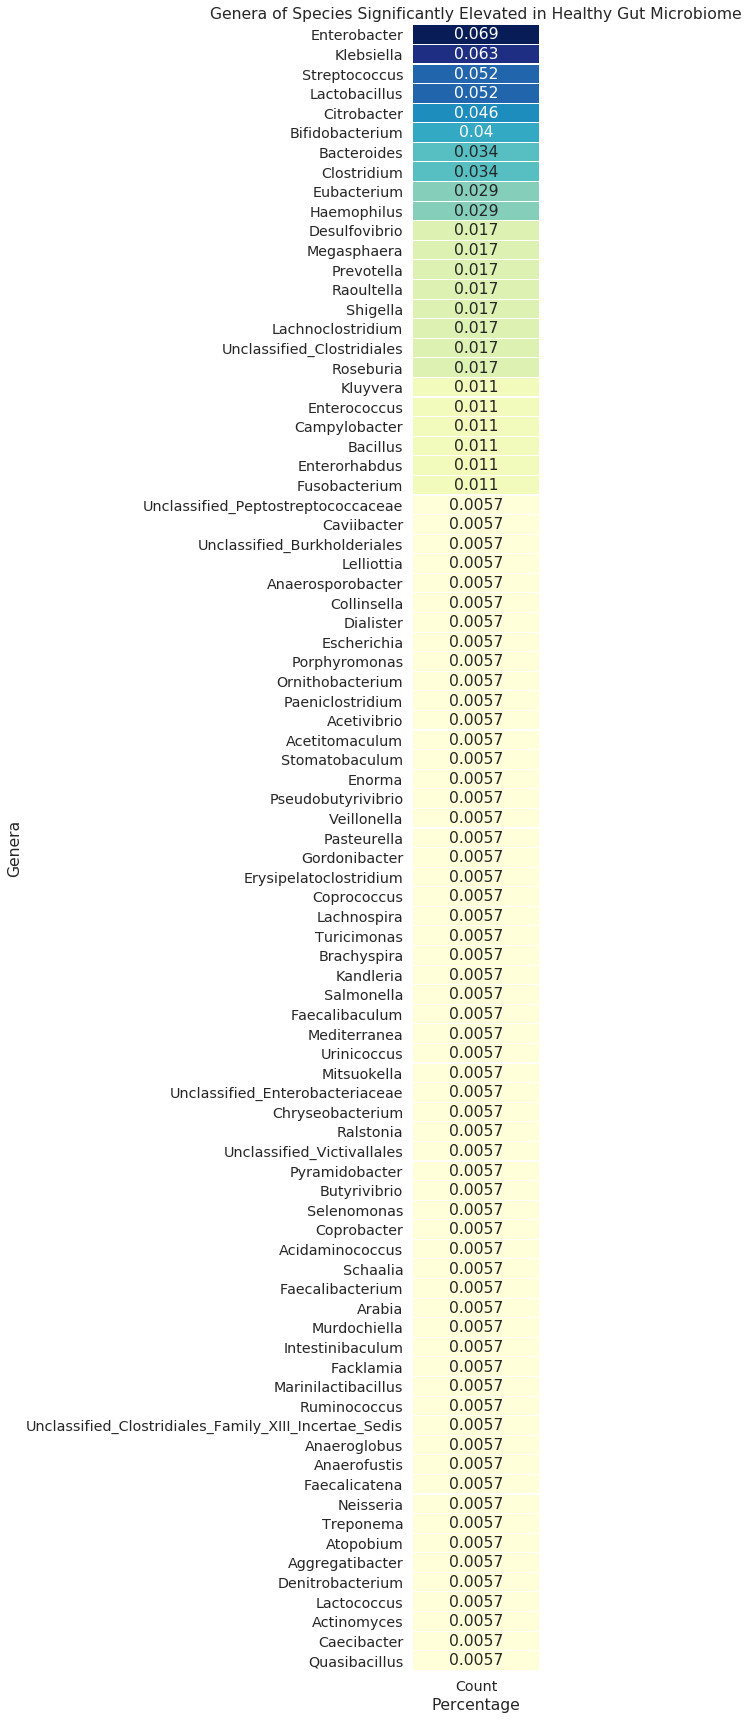

In [108]:
rcParams['figure.figsize'] = 2.27,30.27
sns.heatmap(temp2, annot=True, cbar=False,cmap="YlGnBu", xticklabels=1, yticklabels=1, linewidths=.1)
plt.ylabel("Genera")
plt.xlabel("Percentage")
plt.title("Genera of Species Significantly Elevated in Healthy Gut Microbiome")
#plt.savefig("elevatedHealthySpeciesGenera", bbox_inches='tight', dpi=300)

## Look at differential abundance of PFAMS

In [109]:
# Test for statistical significance Mann-Whitney U Test
from statsmodels.stats.multitest import multipletests
import scipy
from scipy import stats
import os
import statistics
import statsmodels
import statsmodels.api as sm 
import random

def runMann_PFAM(df1, df2, alpha, correction):
    
    dfstat={'PFAM':[], "Healthy_Median":[], "Healthy_Distribution":[], "CRC_Median":[], "CRC_Distribution":[],'Test':[],'Test_Statistic':[],'P_Value':[]}
    
    dfHealthy = df1.copy()
    dfCRC = df2.copy()
    
    MTC_Value = float(alpha)/len(df2.columns)
    
    for pfam in list(dfHealthy.columns):
        dfstat['PFAM'].append(pfam)

        healthyPfam = list(reversed(sorted(list(dfHealthy[pfam]),key=float)))
        crcPfam = list(reversed(sorted(list(dfCRC[pfam]),key=float)))

        #Check Data Distribution for Normalicy: based on D’Agostino and Pearson’s 
        try:
            nt1, np1 = stats.normaltest(healthyPfam)
            nt2, np2 = stats.normaltest(crcPfam)

            if (np1 < alpha):
                    dfstat["Healthy_Distribution"].append('Not Normally Distributed')
            else:
                    dfstat["Healthy_Distribution"].append('Normally Distributed')

            if (np2 < alpha):
                    dfstat["CRC_Distribution"].append('Not Normally Distributed')
            else:
                    dfstat["CRC_Distribution"].append('Normally Distributed')


            (test_statistic, p_value) = stats.mannwhitneyu(healthyPfam,crcPfam, alternative="two-sided") 

            dfstat["Healthy_Median"].append(statistics.median(healthyPfam))
            dfstat["CRC_Median"].append(statistics.median(crcPfam))
            dfstat['Test'].append('Mann-Whitney U Test')
            dfstat['Test_Statistic'].append(test_statistic)
            dfstat['P_Value'].append(p_value)
        except:
            dfstat["Healthy_Distribution"].append('Not Enough Samples')
            dfstat["CRC_Distribution"].append('Not Enough Samples')
            dfstat["Healthy_Median"].append('Not Enough Samples')
            dfstat["CRC_Median"].append('Not Enough Samples')
            dfstat['Test'].append('Not Enough Samples')
            dfstat['Test_Statistic'].append('Not Enough Samples')
            dfstat['P_Value'].append('Not Enough Samples')

    # Perform multiple testing correction
    dfstat2 = pd.DataFrame(data=dfstat)
    dfstat3 = dfstat2.copy()
    FDRcorrectionList= multipletests(dfstat2['P_Value'], alpha=alpha, method=correction, is_sorted=False, returnsorted=False)
    dfstat3['Correction_Performed'] = correction
    dfstat3['Corrected_Pvalue'] = list(FDRcorrectionList[1])
    dfstat3['Reject'] = list(FDRcorrectionList[0])
    dfstat4 = dfstat3[dfstat3['Reject']==True].copy()
    return (dfstat4)

In [110]:
#Abundance of PFAMS that are CLR transformed
PFAMabundance = pd.read_csv('./Files/Dataframes/HealthyCRC_FeatureCount_PFAM.csv').set_index("SampleName")
PFAMabundance.head()

,PF06988,PF07864,PF12395,PF11859,PF18810,PF15568,PF12525,PF15922,PF04550,PF15541,...,PF00793,PF12378,PF12279,PF10967,PF13802,PF00093,PF12811,PF18472,PF16439,Cohort
SampleName,,,,,,,,,,,,,,,,,,,,,
DRR127524,-6.745798,-6.745798,7.256120,-6.745798,-6.745798,-6.745798,-6.745798,6.501109,-0.337350,-6.745798,...,8.287311,-6.745798,-6.745798,-6.745798,8.228646,-6.745798,1.043591,-6.745798,0.637204,Healthy
DRR127613,2.097784,-6.666507,7.795366,-6.666507,2.254934,-6.666507,-6.666507,4.269753,-6.666507,-6.666507,...,8.103508,-6.666507,-6.666507,-6.666507,7.966789,-6.666507,2.200136,-6.666507,0.915268,Healthy
DRR127616,-5.712217,-5.712217,9.250266,-5.712217,3.572573,-5.712217,-5.712217,-5.712217,-5.712217,-5.712217,...,8.968353,-5.712217,-5.712217,-5.712217,8.703188,-5.712217,5.754659,-5.712217,1.287381,Healthy
DRR127628,-6.767499,-6.767499,7.978316,-6.767499,4.491592,-6.767499,-6.767499,4.512994,0.820553,-6.767499,...,8.110003,-6.767499,-6.767499,-6.767499,7.970787,-6.767499,1.364042,0.171325,-6.767499,Healthy
DRR127672,-5.385782,-5.385782,8.598895,-5.385782,3.922564,-5.385782,-5.385782,-5.385782,-5.385782,-5.385782,...,9.084371,-5.385782,-5.385782,-5.385782,9.832404,-5.385782,-5.385782,-5.385782,4.257984,Healthy


In [111]:
crc_pfam = PFAMabundance[PFAMabundance['Cohort']=='CRC'].drop(columns=['Cohort']).copy()
crc_healthy = PFAMabundance[PFAMabundance['Cohort']=='Healthy'].drop(columns=['Cohort']).copy()

In [112]:
daPFAM = runMann_PFAM(crc_healthy,crc_pfam, 0.05, 'fdr_bh')
daPFAM2 = daPFAM.set_index("PFAM").sort_values(by=['Corrected_Pvalue'], ascending=True).copy()

In [113]:
#NEED TO MAKE IT FDR correction, only pvalues below or equal to corrected alpha (0.05)
print(daPFAM2.shape)
daPFAM2[['Healthy_Median','CRC_Median','Corrected_Pvalue']]

(12, 10)


,Healthy_Median,CRC_Median,Corrected_Pvalue
PFAM,,,
PF08254,0.656293,-6.235979,1.110805e-14
PF14255,-5.356354,-6.229333,4.435526e-10
PF11962,-1.925865,-6.141857,1.224731e-06
PF08191,-5.673367,3.484002,1.224731e-06
PF09403,-5.738720,2.727507,1.254528e-05
PF07087,-6.032200,-3.256442,5.295768e-05
PF04122,2.123856,3.819037,8.606748e-04
PF17886,-6.032200,-5.534243,1.748995e-02
PF16728,-6.061185,-5.613685,1.748995e-02


In [114]:
highCRCPfam, highHealthyPfam = CompareDA(daPFAM2)

In [115]:
highCRCPfam

['PF08191', 'PF09403', 'PF07087', 'PF04122', 'PF17886', 'PF16728', 'PF01345']

In [116]:
highHealthyPfam

['PF08254', 'PF14255', 'PF11962', 'PF06308', 'PF14104']

In [117]:
CorrectOrderPFAMs = highCRCPfam + highHealthyPfam

In [118]:
pfamTest = daPFAM2.loc[CorrectOrderPFAMs][['Healthy_Median','CRC_Median','Corrected_Pvalue']].copy()
pfamTest

,Healthy_Median,CRC_Median,Corrected_Pvalue
PFAM,,,
PF08191,-5.673367,3.484002,1.224731e-06
PF09403,-5.738720,2.727507,1.254528e-05
PF07087,-6.032200,-3.256442,5.295768e-05
PF04122,2.123856,3.819037,8.606748e-04
PF17886,-6.032200,-5.534243,1.748995e-02
PF16728,-6.061185,-5.613685,1.748995e-02
PF01345,4.196018,4.807215,2.122640e-02
PF08254,0.656293,-6.235979,1.110805e-14
PF14255,-5.356354,-6.229333,4.435526e-10


## Examine TIGRFAMS

In [119]:
# Test for statistical significance Mann-Whitney U Test
from statsmodels.stats.multitest import multipletests
import scipy
from scipy import stats
import os
import statistics
import statsmodels
import statsmodels.api as sm 
import random

def runMann_TFAM(df1, df2, alpha, correction):
    
    dfstat={'TIGRFAM':[], "Healthy_Median":[], "Healthy_Distribution":[], "CRC_Median":[], "CRC_Distribution":[],'Test':[],'Test_Statistic':[],'P_Value':[]}
    
    dfHealthy = df1.copy()
    dfCRC = df2.copy()
    
    MTC_Value = float(alpha)/len(df2.columns)
    
    for tfam in list(dfHealthy.columns):
        dfstat['TIGRFAM'].append(tfam)

        healthyTfam = list(reversed(sorted(list(dfHealthy[tfam]),key=float)))
        crTPfam = list(reversed(sorted(list(dfCRC[tfam]),key=float)))

        #Check Data Distribution for Normalicy: based on D’Agostino and Pearson’s 
        try:
            nt1, np1 = stats.normaltest(healthyTfam)
            nt2, np2 = stats.normaltest(crTPfam)

            if (np1 < alpha):
                    dfstat["Healthy_Distribution"].append('Not Normally Distributed')
            else:
                    dfstat["Healthy_Distribution"].append('Normally Distributed')

            if (np2 < alpha):
                    dfstat["CRC_Distribution"].append('Not Normally Distributed')
            else:
                    dfstat["CRC_Distribution"].append('Normally Distributed')


            (test_statistic, p_value) = stats.mannwhitneyu(healthyTfam,crTPfam, alternative="two-sided") 

            dfstat["Healthy_Median"].append(statistics.median(healthyTfam))
            dfstat["CRC_Median"].append(statistics.median(crTPfam))
            dfstat['Test'].append('Mann-Whitney U Test')
            dfstat['Test_Statistic'].append(test_statistic)
            dfstat['P_Value'].append(p_value)
        except:
            dfstat["Healthy_Distribution"].append('Not Enough Samples')
            dfstat["CRC_Distribution"].append('Not Enough Samples')
            dfstat["Healthy_Median"].append('Not Enough Samples')
            dfstat["CRC_Median"].append('Not Enough Samples')
            dfstat['Test'].append('Not Enough Samples')
            dfstat['Test_Statistic'].append('Not Enough Samples')
            dfstat['P_Value'].append('Not Enough Samples')

    # Perform multiple testing correction
    dfstat2 = pd.DataFrame(data=dfstat)
    dfstat3 = dfstat2.copy()
    FDRcorrectionList= multipletests(dfstat2['P_Value'], alpha=alpha, method=correction, is_sorted=False, returnsorted=False)
    dfstat3['Correction_Performed'] = correction
    dfstat3['Corrected_Pvalue'] = list(FDRcorrectionList[1])
    dfstat3['Reject'] = list(FDRcorrectionList[0])
    dfstat4 = dfstat3[dfstat3['Reject']==True].copy()
    return (dfstat4)

In [120]:
#Abundance of PFAMS that are CLR transformed
TFAMabundance = pd.read_csv('./Files/Dataframes/CRC_Healthy_TIGRFAM_CLR.csv').set_index("SampleName")
TFAMabundance.head()

,TIGR02497,TIGR00366,TIGR02778,TIGR00283,TIGR02100,TIGR02359,TIGR00224,TIGR00745,TIGR00260,TIGR04171,...,TIGR00100,TIGR01295,TIGR03494,TIGR02795,TIGR04431,TIGR01733,TIGR01685,TIGR02956,TIGR00967,Cohort
SampleName,,,,,,,,,,,,,,,,,,,,,
DRR171523,-7.945645,-7.945645,-0.473838,-7.945645,6.583094,6.642936,9.251444,7.367812,7.849597,6.189060,...,5.272885,2.267099,-7.945645,6.416712,-7.945645,6.749850,-7.945645,-7.945645,8.590929,Healthy
DRR127524,-0.919984,4.798844,-1.686187,-1.109226,6.045597,4.591234,7.586677,5.928976,6.837771,6.369364,...,6.628480,4.579193,4.459790,6.099538,-8.732652,6.751634,-8.732652,5.072831,7.756360,Healthy
DRR127532,-8.147971,-8.147971,-1.421175,-8.147971,7.086920,4.114792,7.457865,7.221593,6.907995,6.611732,...,7.698543,2.869548,-8.147971,7.272160,-8.147971,6.846824,-8.147971,6.702774,8.452144,Healthy
DRR127535,-8.365691,5.863771,-1.805688,-8.365691,7.106825,4.000409,7.828638,6.535895,7.071477,6.718270,...,7.317292,0.935250,6.157591,7.090394,-8.365691,7.228194,-8.365691,5.799133,8.166015,Healthy
DRR127537,5.269658,5.353556,0.077192,-2.942934,7.332868,4.198279,6.856598,6.684241,7.325284,7.250780,...,6.994724,3.298018,2.834525,6.301424,-8.617274,6.414184,-8.617274,5.888718,8.096978,Healthy


In [121]:
crc_tfam = TFAMabundance[TFAMabundance['Cohort']=='CRC'].drop(columns=['Cohort']).copy()
healthy_tfam = TFAMabundance[TFAMabundance['Cohort']=='Healthy'].drop(columns=['Cohort']).copy()

In [122]:
daTFAM = runMann_TFAM(healthy_tfam,crc_tfam, 0.05, 'fdr_bh')
daTFAM2 = daTFAM.set_index("TIGRFAM").sort_values(by=['Corrected_Pvalue'], ascending=True).copy()

In [123]:
#only pvalues below or equal to corrected alpha (0.05)
print(daTFAM2.shape)
TigerTest = daTFAM2[['Healthy_Median','CRC_Median','Corrected_Pvalue']].copy()
TigerTest

(2, 10)


,Healthy_Median,CRC_Median,Corrected_Pvalue
TIGRFAM,,,
TIGR02077,0.357274,-8.007909,3.792699e-15
TIGR01249,-1.014171,0.430146,1.262132e-02


In [124]:
import json

loaded_json = {}

with open("./Files/Dictionary/tigrfamDictionary.json", 'r+') as f:
    loaded_json = json.loads(f.read())

loaded_json

{'TIGR02486': 'RDH: reductive dehalogenase',
 'TIGR00722': 'ttdA_fumA_fumB: hydrolyase, tartrate alpha subunit/fumarate domain protein, Fe-S type',
 'TIGR02198': 'rfaE_dom_I: bifunctional protein RfaE, domain I',
 'TIGR02931': 'anfK_nitrog: Fe-only nitrogenase, beta subunit',
 'TIGR02311': 'HpaI: 2,4-dihydroxyhept-2-ene-1,7-dioic acid aldolase',
 'TIGR00038': 'efp: translation elongation factor P',
 'TIGR04325': 'MTase_LIC12133: putative methyltransferase, LIC12133 family',
 'TIGR03231': 'anthran_1_2_B: anthranilate 1,2-dioxygenase, small subunit',
 'TIGR02818': 'adh_III_F_hyde: S-(hydroxymethyl)glutathione dehydrogenase/class III alcohol dehydrogenase',
 'TIGR03175': 'AllD: ureidoglycolate dehydrogenase',
 'TIGR00286': 'TIGR00286: arginine decarboxylase, pyruvoyl-dependent',
 'TIGR00253': 'RNA_bind_YhbY: putative RNA-binding protein, YhbY family',
 'TIGR02894': 'DNA_bind_RsfA: transcription factor, RsfA family',
 'TIGR00358': "3_prime_RNase: VacB and RNase II family 3'-5' exoribonucle

In [125]:
import json

loaded_json2 = {}

with open("./Files/Dictionary/pfamDictionary.json", 'r+') as f:
    loaded_json2 = json.loads(f.read())

loaded_json2

{'PF11670': 'Major surface protein 1a (MSP1a)',
 'PF12574': '120 KDa Rickettsia surface antigen',
 'PF10961': 'Selenoprotein SelK_SelG',
 'PF07859': 'alpha/beta hydrolase fold',
 'PF12534': 'Pannexin-like TM region of LRRC8',
 'PF13347': 'MFS/sugar transport protein',
 'PF11871': 'Domain of unknown function (DUF3391)',
 'PF09526': 'Probable metal-binding protein (DUF2387)',
 'PF05826': 'Phospholipase A2',
 'PF14739': 'Domain of unknown function (DUF4472)',
 'PF11885': 'Protein of unknown function (DUF3405)',
 'PF14295': 'PAN domain',
 'PF07108': 'PipA protein',
 'PF11847': 'Alpha-(1->3)-arabinofuranosyltransferase',
 'PF02878': 'Phosphoglucomutase/phosphomannomutase, alpha/beta/alpha domain I',
 'PF04794': 'YdjC-like protein',
 'PF03172': 'HSR domain',
 'PF01824': 'MatK/TrnK amino terminal region',
 'PF11174': 'Protein of unknown function (DUF2970)',
 'PF07286': 'Protein of unknown function (DUF1445)',
 'PF06925': 'Monogalactosyldiacylglycerol (MGDG) synthase',
 'PF14257': 'Domain of u

In [126]:
for i in pfamTest.index:
    print(i)
    print(loaded_json2[i])
    print("\n")

PF08191
LRR adjacent


PF09403
Adhesion protein FadA


PF07087
Protein of unknown function (DUF1353)


PF04122
Putative cell wall binding repeat 2


PF17886
HSP20-like domain found in ArsA


PF16728
Domain of unknown function (DUF5066)


PF01345
Domain of unknown function DUF11


PF08254
Threonine leader peptide


PF14255
Cysteine-rich CPXCG


PF11962
Peptidase_G2, IMC autoproteolytic cleavage domain


PF06308
23S rRNA methylastransferase leader peptide (ErmCL)


PF14104
Domain of unknown function (DUF4277)




In [127]:
tempDict = {'Group':[], 'Functional Region':[], 'qvalue':[]}
for i in pfamTest.index:
    tempDict['Functional Region'].append(i)
    if pfamTest.at[i,'Healthy_Median'] < pfamTest.at[i,'CRC_Median']:
        
        tempDict['Group'].append('CRC')
    else:
        tempDict['Group'].append('Healthy')
    tempDict['qvalue'].append(pfamTest.at[i,'Corrected_Pvalue'])
tempDict

{'Group': ['CRC',
  'CRC',
  'CRC',
  'CRC',
  'CRC',
  'CRC',
  'CRC',
  'Healthy',
  'Healthy',
  'Healthy',
  'Healthy',
  'Healthy'],
 'Functional Region': ['PF08191',
  'PF09403',
  'PF07087',
  'PF04122',
  'PF17886',
  'PF16728',
  'PF01345',
  'PF08254',
  'PF14255',
  'PF11962',
  'PF06308',
  'PF14104'],
 'qvalue': [1.2247305804200672e-06,
  1.2545281415967058e-05,
  5.295767503181219e-05,
  0.0008606748142225273,
  0.01748995280881971,
  0.01748995280881971,
  0.021226398796517432,
  1.110804785387659e-14,
  4.435526071786922e-10,
  1.2247305804200672e-06,
  0.01748995280881971,
  0.01748995280881971]}

## Look at significance of diversity scores

In [128]:
# Test for statistical significance Mann-Whitney U Test
from statsmodels.stats.multitest import multipletests
import scipy
from scipy import stats
import os
import statistics
import statsmodels
import statsmodels.api as sm 
import random

def runMann(df1, df2, name1, name2, alpha, epochs):
    dfstat={str(name1+"_Median"):[], str(name1+"_Distribution"):[],str(name2+"_Median"):[],str(name2+"_Distribution"):[],'Test':[],'Test_Statistic':[],'P_Value':[]}
    
    d = np.array(df1)
    g = np.array(df2)
    
    #Check Data Distribution for Normalicy: based on D’Agostino and Pearson’s 
    nt1, np1 = stats.normaltest(d)
    nt2, np2 = stats.normaltest(g)
    
    if (np1 < alpha):
            dfstat[str(name1+"_Distribution")].append('Not Normally Distributed')
    else:
            dfstat[str(name1+"_Distribution")].append('Normally Distributed')
            
    if (np2 < alpha):
            dfstat[str(name2+"_Distribution")].append('Not Normally Distributed')
    else:
            dfstat[str(name2+"_Distribution")].append('Normally Distributed')
            
    (test_statistic, p_value) = stats.mannwhitneyu(d, g, alternative="two-sided") 
    
    dfstat[str(name1+"_Median")].append(statistics.median(d))
    dfstat[str(name2+"_Median")].append(statistics.median(g))
    dfstat['Test'].append('Mann-Whitney U Test')
    dfstat['Test_Statistic'].append(test_statistic)
    dfstat['P_Value'].append(p_value)

    dfstat2 = pd.DataFrame(data=dfstat)
    return (dfstat2)

In [129]:
swj = swiDF['ShannonWienerIndex'][swiDF['Cohort']=='Healthy'].copy()
swcrc = swiDF['ShannonWienerIndex'][swiDF['Cohort']=='CRC'].copy()

swCRCJ = runMann(swj,swcrc,'Healthy', 'CRC', 0.05, 500)
swCRCJ.set_index("P_Value")

,Healthy_Median,Healthy_Distribution,CRC_Median,CRC_Distribution,Test,Test_Statistic
P_Value,,,,,,
0.000957,3.391782,Not Normally Distributed,3.595845,Not Normally Distributed,Mann-Whitney U Test,4845.0


In [130]:
srj = speciesRichDF['Species_Richness'][speciesRichDF['Cohort']=='Healthy'].copy()
srcrc = speciesRichDF['Species_Richness'][speciesRichDF['Cohort']=='CRC'].copy()

srCRCJ = runMann(srj,srcrc,'Healthy', 'CRC', 0.05, 500)
srCRCJ.set_index("P_Value")

,Healthy_Median,Healthy_Distribution,CRC_Median,CRC_Distribution,Test,Test_Statistic
P_Value,,,,,,
0.000551,305.5,Normally Distributed,331.5,Normally Distributed,Mann-Whitney U Test,4765.0


In [131]:
efnsj = EFNS_DF['EFNS'][EFNS_DF['Cohort']=='Healthy'].copy()
efnscrc = EFNS_DF['EFNS'][EFNS_DF['Cohort']=='CRC'].copy()

efnsCRCJ = runMann(efnsj,efnscrc,'Healthy', 'CRC', 0.05, 500)
efnsCRCJ.set_index("P_Value")

,Healthy_Median,Healthy_Distribution,CRC_Median,CRC_Distribution,Test,Test_Statistic
P_Value,,,,,,
0.000957,29.720478,Normally Distributed,36.446499,Normally Distributed,Mann-Whitney U Test,4845.0


In [134]:
simpj = simpsonDF['Simpson'][simpsonDF['Cohort']=='Healthy'].copy()
simpcrc = simpsonDF['Simpson'][simpsonDF['Cohort']=='CRC'].copy()

simpCRCJ = runMann(simpj,simpcrc,'Healthy', 'CRC', 0.05, 500)
simpCRCJ.set_index("P_Value")

,Healthy_Median,Healthy_Distribution,CRC_Median,CRC_Distribution,Test,Test_Statistic
P_Value,,,,,,
0.023878,0.925584,Not Normally Distributed,0.938846,Not Normally Distributed,Mann-Whitney U Test,5395.0
